### Proyecto Data Science 1 - CoderHouse
# Retención de estudiantes


## Abstract

Este proyecto se enfoca en entender los factores que influyen en la retención de estudiantes en la educación superior. Para esto, usamos un conjunto de datos de Kaggle que contiene información de más de 4.000 estudiantes universitarios. Este dataset es bastante completo, incluyendo datos académicos, socioeconómicos y demográficos. La variable principal que analizamos clasifica a los estudiantes en tres estados: **Graduado, Abandonó o Inscripto**, lo que nos permite estudiar los patrones relacionados con el éxito o la continuidad académica.

En la primera instancia, el objetivo fue identificar posibles correlaciones entre las características individuales de los estudiantes y su permanencia en el sistema educativo.

En esta segunda instancia, avanzamos desde el análisis exploratorio hacia la construcción de un modelo predictivo. Para ello, aplicamos un método de feature selection que nos permitió reducir la dimensionalidad del dataset y quedarnos con las variables más relevantes para explicar la permanencia de los estudiantes. Posteriormente, entrenamos un algoritmo de clasificación supervisada para predecir el estado final de cada estudiante (Graduado, Abandonó o Inscripto) en función de sus características académicas, demográficas y socioeconómicas. Finalmente, evaluamos el desempeño del modelo mediante métricas básicas como accuracy, precision, recall y F1-score, además de una matriz de confusión que permite visualizar los aciertos y errores en la clasificación. Este enfoque nos ofrece no solo una herramienta para anticipar trayectorias estudiantiles, sino también una base empírica para discutir los factores que más influyen en la retención académica.

---

Mejores features seleccionadas:
Index(['Application mode', 'Displaced', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)'],
      dtype='object')

--- Classification Report ---
              precision    recall  f1-score   support

     Dropout       0.79      0.76      0.78       427
    Enrolled       0.53      0.34      0.41       238
    Graduate       0.81      0.94      0.87       663

    accuracy                           0.77      1328
   macro avg       0.71      0.68      0.68      1328
weighted avg       0.75      0.77      0.76      1328



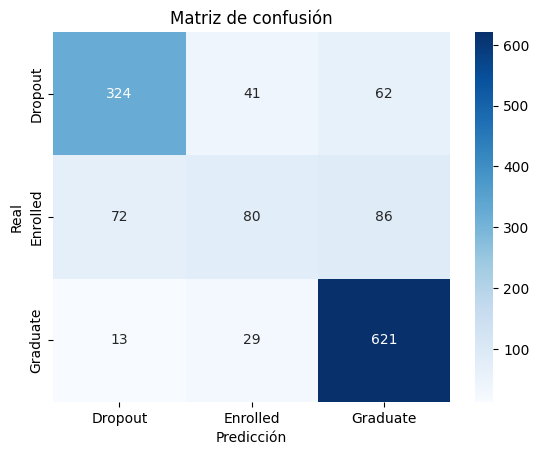

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df_main = pd.read_csv("dataset.csv")

# 1) Aseguramos el target numérico
target_map = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df_main['Target_Num'] = df_main['Target'].map(target_map)

# 2) Features y target
X = df_main.drop(columns=['Target', 'Target_Num'])
y = df_main['Target_Num']

# One-hot encoding para variables categóricas
X = pd.get_dummies(X, drop_first=True)

# Escalamos variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Feature Selection (quedarnos con las 15 más relevantes)
selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X_scaled, y)

selected_features = X.columns[selector.get_support()]
print("Mejores features seleccionadas:")
print(selected_features)

# 4) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42, stratify=y
)

# 5) Entrenamos modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 6) Predicciones
y_pred = model.predict(X_test)

# 7) Métricas
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=target_map.keys()))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_map.keys(),
            yticklabels=target_map.keys())
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()


# Conclusiones

El modelo de clasificación entrenado alcanza un 77% de accuracy al predecir el estado final de los estudiantes, demostrando un desempeño sólido considerando la complejidad de la variable dependiente con tres categorías: Graduado, Abandonó e Inscripto.

El análisis por clase muestra que el modelo identifica con alta precisión a los graduados, alcanzando un recall del 94% y un F1-score de 0.87, lo que indica que los patrones asociados al éxito académico son consistentes y fácilmente detectables.

Los desertores también se predicen razonablemente bien, con un recall del 76% y un F1-score de 0.78, lo que sugiere que el modelo captura la mayoría de los factores que llevan al abandono académico, aunque con cierta confusión hacia graduados o inscriptos.

La categoría inscriptos resulta más desafiante: el recall es de apenas 34%, reflejando que sus características se solapan con las de los otros grupos, lo que dificulta su diferenciación.

En términos generales, el modelo es eficaz para identificar trayectorias extremas (abandono o graduación), pero la menor capacidad para predecir a los inscriptos indica la necesidad de explorar ajustes adicionales, como algoritmos más sofisticados, optimización de hiperparámetros o incorporación de nuevas variables que permitan discriminar mejor esta categoría intermedia.